In [40]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway


In [3]:
df_nike = pd.read_csv("./data/nike_sales_2024.csv")
df_nike

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50


In [4]:
#Reviso Nulos
nulos_nike = df_nike.isnull().sum()
print("Nulos por columna:")
print(nulos_nike)

Nulos por columna:
Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64


In [5]:
#Reviso Duplicados
duplicados_nike = df_nike.duplicated().sum()
print(f"Filas duplicadas: {duplicados_nike}")

Filas duplicadas: 0


In [6]:
#Reviso los tipos
print(df_nike.dtypes)


Month                      object
Region                     object
Main_Category              object
Sub_Category               object
Product_Line               object
Price_Tier                 object
Units_Sold                  int64
Revenue_USD                 int64
Online_Sales_Percentage     int64
Retail_Price                int64
dtype: object


In [7]:
# Reviso que no hayan palabras que se escriban diferente y que tengan el mismo valor
for col in ['Region', 'Main_Category', 'Sub_Category', 'Price_Tier', "Product_Line"]:
    print(f"Valores únicos en {col}:")
    print(df_nike[col].unique())



Valores únicos en Region:
['India' 'Greater China' 'Japan' 'Europe' 'South Korea' 'America'
 'Southeast Asia']
Valores únicos en Main_Category:
['Equipment' 'Apparel' 'Footwear']
Valores únicos en Sub_Category:
['Bags' 'Accessories' 'Tops' 'Cricket' 'Socks' 'Performance' 'Outerwear'
 'Lifestyle' 'Running' 'Basketball' 'Football']
Valores únicos en Price_Tier:
['Budget' 'Mid-Range' 'Premium']
Valores únicos en Product_Line:
['Gym Sack' 'Hats' 'Tech Fleece' 'Vapor Cricket' 'Performance Socks'
 'Dri-FIT' 'Therma-FIT' 'Bags' 'Crew Socks' 'Backpack' 'Rain Jacket'
 'Air Force 1' 'React Infinity' 'Windrunner' 'Air Jordan'
 'Compression Wear' 'Air Zoom' 'Mercurial' 'Air Max' 'KD Series'
 'LeBron Series' 'Phantom Vision' 'Blazer' 'Pegasus']


In [8]:
def describe_df(df_nike):
    """
    Vamos a generar un resumen detallado de nuestro dataframe

    Los argumentos serán:
    1--> El DataFrame seleccionado que sera df_nike para analizar

    Devuelve:
    pd.DataFrame: Un Dataframe con la información global resumida
                 - Tipo de dato de cada columna
                  - Porcentaje de valores nulos
                  - Cantidad de valores únicos
                  - Porcentaje de cardinalidad
                  - Valores mínimo y máximo (para columnas numéricas)
                  - Moda (valor más frecuente en cada columna)
    """
    
# Paso 1: Tipo de dato de cada columna
    # Usaremos "df.dtypes" ya que devuelve los tipos de datos de cada columna...
    tipos_de_dato = df_nike.dtypes 
    
# Paso 2: Calcular el porcentaje de valores nulos
    # Usaremos "df.isnull()"" que nos devuelve un DataFrame de valores booleanos donde True nos dice que es un valor nulo
    # Usaremos "mean()" para calcular el promedio de estos nulos por columna
    # Multiplicaremos por 100 para obtener el porcentaje y redondeamos a 2 decimales
    porcentaje_nulos = (df_nike.isnull().mean() * 100).round(2)
    
# Paso 3: Contar los valores únicos por columna
    # Usaremos "df.nunique()"" para contar la cantidad de valores únicos en cada columna
    valores_unicos = df_nike.nunique()  
    
# Paso 4: Calcular el porcentaje de cardinalidad
    # Dividimos los valores únicos entre el total y luego multiplicamos por 100 para obtener el porcentaje
    porcentaje_cardinalidad = ((valores_unicos / len(df_nike)) * 100).round(2)
    
    
# Paso 5: Calcular valores mínimo y máximo para columnas numéricas
    # Usaremos "df.select_dtypes(include='number')" para selecciona solo las columnas numéricas
    # Usaremos "min()" y "max()" para calcular los valores mínimo y máximo
    minimos = df_nike.select_dtypes(include='number').min()
    maximos = df_nike.select_dtypes(include='number').max()
    
# Paso 6: Calcular la moda 
    # Usaremos "df.mode()" que nos devolverá el valor más frecuente en cada columna. Si hay varias, seleccionaremos la primera con ".iloc[0]"
    moda = df_nike.mode().iloc[0]
    
# Paso 8: Construir el resumen
    # Crearemos un diccionario
    resumen = {
        "Tipo de dato": tipos_de_dato,
        "% Nulos": porcentaje_nulos,
        "Valores únicos": valores_unicos,
        "% Cardinalidad": porcentaje_cardinalidad,
        "Valor mínimo": minimos,
        "Valor máximo": maximos,
        "Moda": moda
    }
    
# Paso 9 Convertiremos el diccionario en un DataFrame 
    resumen_df_nike = pd.DataFrame(resumen)
    
# Paso 10: Retornaremos
    return resumen_df_nike


In [9]:
descripcion = describe_df(df_nike)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)     
print(descripcion)

                        Tipo de dato  % Nulos  Valores únicos  % Cardinalidad  Valor mínimo  Valor máximo           Moda
Main_Category                 object      0.0               3             0.3           NaN           NaN      Equipment
Month                         object      0.0              12             1.2           NaN           NaN       December
Online_Sales_Percentage        int64      0.0              41             4.1          50.0          90.0           73.0
Price_Tier                    object      0.0               3             0.3           NaN           NaN         Budget
Product_Line                  object      0.0              24             2.4           NaN           NaN     Windrunner
Region                        object      0.0               7             0.7           NaN           NaN  Greater China
Retail_Price                   int64      0.0              26             2.6          50.0         300.0          290.0
Revenue_USD                    i

In [10]:
def tipifica_variables(df_nike, umbral_categoria, umbral_continua):
    """
    Esta funcion no dara el tipo de variable para cada columna de nuestro dataframe

    Argumentos:
    DataFrame: Evaluaremos  las variables
    umbral_categoria (int): Umbral para definir si una variable es categórica
    umbral_continua (float): Porcentaje mínimo de cardinalidad para definir si una variable es continua

    Retorna:
    DataFrame: Dos columnas una con el nombre de la variable y el otro con el tipo de variable, que contiene el nombre de cada variable y su tipo sugerido (Binaria, Categórica, Numérica Continua,"Numérica Discreta).
    """

# Paso 1 Creanis una lista donde se guardarán los resultados
    resultados = []

    # Paso 2.1 Itineramos por cada columna del DataFrame de entrada
    for col in df_nike.columns:
        # Paso 6 Verificamos si la columna contiene valores categóricos basados en su tipo de dato como puede ser object
        if df_nike[col].dtype == 'object' or isinstance(df_nike[col].iloc[0], str):
            tipo = "Categórica"
        # Paso 2.2 Calculamos la cardinalidad: el número de valores únicos de la columna
        else:
            valores_unicos = df_nike[col].nunique()
         # Paso 2.3 Calculamos el porcentaje de cardinalidad
            porcentaje_cardinalidad = valores_unicos / len(df_nike)

        # Paso 2.4 Clasificamos las columnas segun las reglas dadas por el guion del trabajo
            if valores_unicos == 2:  
                tipo = "Binaria"
            elif valores_unicos < umbral_categoria:  # Si la cardinalidad es menor al umbral
                tipo = "Categórica"
            else:  # Si la cardinalidad es mayor o igual al umbral
                if porcentaje_cardinalidad >= umbral_continua:
                    tipo = "Numérica Continua"  # Si el porcentaje de cardinalidad es mayor o igual al umbral continuo
                else:
                    tipo = "Numérica Discreta"  # Caso contrario, es discreta

        # Paso 2.5 Añadimos el resultado como un diccionario con el nombre de la columna y su tipo sugerido
        resultados.append({"nombre_variable": col, "tipo_sugerido": tipo})

    # Paso 3 Convertimos la lista de resultados en un DF
    resultado_df_nike = pd.DataFrame(resultados)

    # Paso 4 Devolvemos el DF
    return resultado_df_nike


In [11]:
#Paso 5 Llamamos a la funcion y le pasomos 3 argumentos, 1 DF, 2 umbral categoria (Si tiene menos de 4 valores únicos es categorica), 3 umbral continua (0.5--> 50% de las filas tienen valores únicos) si el % es menor es discreta.
resultado = tipifica_variables(df_nike, umbral_categoria=4, umbral_continua=0.5)
print(resultado)


           nombre_variable      tipo_sugerido
0                    Month         Categórica
1                   Region         Categórica
2            Main_Category         Categórica
3             Sub_Category         Categórica
4             Product_Line         Categórica
5               Price_Tier         Categórica
6               Units_Sold  Numérica Continua
7              Revenue_USD  Numérica Continua
8  Online_Sales_Percentage  Numérica Discreta
9             Retail_Price  Numérica Discreta


In [12]:
def get_features_num_regression(df, target_col, umbral_corr, pvalue=None):
    """
    Devuelve una lista con las columnas numéricas del DataFrame cuya correlación absoluta con target_col 
    sea superior a umbral_corr. Si pvalue no es None, también se filtran por significación estadística.
    Si los argumentos de entrada no son adecuados, devuelve None e imprime la razón.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Columna del DataFrame que será utilizada como target (debe ser numérica continua).
        umbral_corr (float): Umbral de correlación absoluta (0 a 1).
        pvalue (float, optional): Nivel de significancia para filtrar (1 - pvalue).

    Returns:
        list or None: Lista de columnas numéricas que cumplen los criterios, o None si los argumentos son inválidos.
    """
    # Comprobación 1: Que el DataFrame sea válido
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'df' debe ser un DataFrame de pandas.")
        return None

    # Comprobación 2: Que target_col exista y sea numérica continua
    if target_col not in df.columns:
        print(f"Error: La columna target '{target_col}' no está en el DataFrame.")
        return None
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: La columna target '{target_col}' no es numérica.")
        return None
    if len(df[target_col].unique()) <= 10:  # Suponemos que <10 valores únicos no es continuo
        print(f"Error: La columna target '{target_col}' no parece ser continua (tiene pocos valores únicos).")
        return None

    # Comprobación 3: Que umbral_corr sea un float entre 0 y 1
    if not isinstance(umbral_corr, (float, int)) or not (0 <= umbral_corr <= 1):
        print("Error: El argumento 'umbral_corr' debe ser un número entre 0 y 1.")
        return None

    # Comprobación 4: Que pvalue sea None o un float válido
    if pvalue is not None and (not isinstance(pvalue, (float, int)) or not (0 < pvalue <= 1)):
        print("Error: El argumento 'pvalue' debe ser None o un número entre 0 y 1.")
        return None

    # Seleccionar columnas numéricas excluyendo el target
    columnas_numericas = df.select_dtypes(include='number').columns
    columnas_numericas = [col for col in columnas_numericas if col != target_col]

    if len(columnas_numericas) == 0:
        print("Error: No hay columnas numéricas (excluyendo la target) en el DataFrame.")
        return None

    # Lista para almacenar las columnas que cumplen los criterios
    columnas_seleccionadas = []

    # Calcular correlaciones y valores p
    for col in columnas_numericas:
        correlacion, p_val = pearsonr(df[col], df[target_col])

        # Filtrar por correlación
        if abs(correlacion) > umbral_corr:
            # Filtrar por p-value si se proporciona
            if pvalue is None or p_val <= pvalue:
                columnas_seleccionadas.append(col)

    # Si no se encuentran columnas que cumplan los criterios, devolver None
    if not columnas_seleccionadas:
        print("No se encontraron columnas que cumplan con los criterios especificados.")
        return None

    return columnas_seleccionadas

In [25]:

# Define los parámetros correctos
target_col = "Retail_Price"  
umbral_corr = 0.5
pvalue = 0.05

# Llama a la función
columnas_seleccionadas = get_features_num_regression(df_nike, target_col, umbral_corr, pvalue)

# Verifica el resultado
print("Columnas seleccionadas:", columnas_seleccionadas)


Columnas seleccionadas: ['Revenue_USD']


In [36]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Crea pairplots de las columnas numéricas del DataFrame relacionadas con target_col.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Columna objetivo, debe ser numérica.
        columns (list): Lista de columnas numéricas a considerar (opcional).
        umbral_corr (float): Umbral de correlación mínima en valor absoluto (por defecto 0).
        pvalue (float, optional): Nivel de significancia estadística (por defecto None).
        
    Returns:
        list: Lista de columnas que cumplen los criterios.
    """
    # Validaciones iniciales
    if not isinstance(df, pd.DataFrame):
        print("Error: 'df' debe ser un DataFrame.")
        return None
    if target_col not in df.columns:
        print(f"Error: La columna objetivo '{target_col}' no está en el DataFrame.")
        return None
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: La columna objetivo '{target_col}' no es numérica.")
        return None
    if not isinstance(columns, list):
        print("Error: 'columns' debe ser una lista.")
        return None
    if not isinstance(umbral_corr, (float, int)) or not (0 <= umbral_corr <= 1):
        print("Error: 'umbral_corr' debe ser un número entre 0 y 1.")
        return None
    if pvalue is not None and (not isinstance(pvalue, (float, int)) or not (0 < pvalue <= 1)):
        print("Error: 'pvalue' debe ser None o un número entre 0 y 1.")
        return None

    # Si la lista 'columns' está vacía, selecciona todas las columnas numéricas
    if not columns:
        columns = df.select_dtypes(include='number').columns.tolist()
        columns.remove(target_col)  # Excluir la columna objetivo

    # Lista para las columnas que cumplen los criterios
    columnas_seleccionadas = []

    # Evaluar correlaciones y valores p
    for col in columns:
        correlacion, p_val = pearsonr(df[col], df[target_col])
        if abs(correlacion) > umbral_corr and (pvalue is None or p_val <= pvalue):
            columnas_seleccionadas.append(col)

    # Si no hay columnas que cumplan los criterios
    if not columnas_seleccionadas:
        print("No se encontraron columnas que cumplan con los criterios especificados.")
        return None

    # Dividir en grupos de máximo 5 columnas
    grupos_columnas = [columnas_seleccionadas[i:i + 4] + [target_col] 
                       for i in range(0, len(columnas_seleccionadas), 4)]

    # Graficar cada grupo
    for grupo in grupos_columnas:
        sns.pairplot(df[grupo])
        plt.show()

    return columnas_seleccionadas


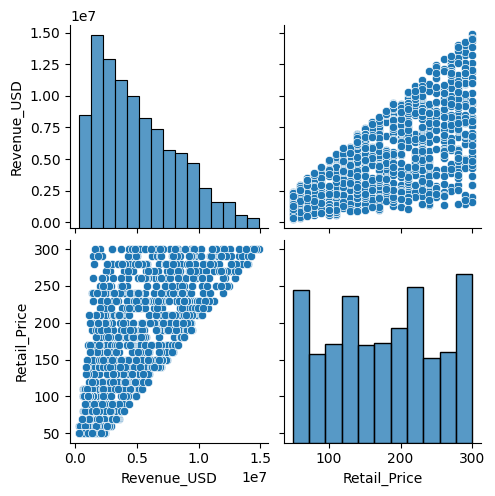

Columnas seleccionadas para graficar: ['Revenue_USD']


In [37]:
# Llamar a la función con tus datos
columnas_graficadas = plot_features_num_regression(
    df=df_nike, 
    target_col="Retail_Price",  # Cambia al nombre exacto de tu columna objetivo
    columns=[],  # Puedes dejarlo vacío para considerar todas las columnas numéricas
    umbral_corr=0.5,  # Umbral de correlación
    pvalue=0.05  # Nivel de significancia (opcional)
)

# Ver las columnas seleccionadas
print("Columnas seleccionadas para graficar:", columnas_graficadas)


In [38]:
from scipy.stats import chi2_contingency, f_oneway
import pandas as pd

def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Devuelve una lista con las columnas categóricas del DataFrame cuyo test de relación
    con la columna designada por 'target_col' supere en confianza estadística el nivel 1-pvalue.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Columna objetivo, debe ser numérica continua.
        pvalue (float): Umbral de significancia estadística (por defecto 0.05).

    Returns:
        list or None: Lista de columnas categóricas que cumplen con los criterios o None si hay errores en los argumentos.
    """
    # Validaciones iniciales
    if not isinstance(df, pd.DataFrame):
        print("Error: 'df' debe ser un DataFrame de pandas.")
        return None
    if target_col not in df.columns:
        print(f"Error: La columna objetivo '{target_col}' no está en el DataFrame.")
        return None
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: La columna objetivo '{target_col}' no es numérica.")
        return None
    if len(df[target_col].unique()) <= 10:
        print(f"Error: La columna objetivo '{target_col}' no tiene suficiente cardinalidad (debe ser continua).")
        return None
    if not isinstance(pvalue, (float, int)) or not (0 < pvalue <= 1):
        print("Error: 'pvalue' debe ser un número entre 0 y 1.")
        return None

    # Selección de columnas categóricas
    cat_columns = df.select_dtypes(include='object').columns.tolist() + df.select_dtypes(include='category').columns.tolist()

    # Lista para almacenar las columnas categóricas que cumplen el test
    columnas_seleccionadas = []

    for col in cat_columns:
        # Validar que la columna categórica no tenga demasiadas categorías únicas
        if df[col].nunique() < 2:
            print(f"Advertencia: La columna '{col}' tiene menos de 2 categorías. Se omitirá.")
            continue

        if df[col].nunique() > 50:
            print(f"Advertencia: La columna '{col}' tiene más de 50 categorías. Se omitirá.")
            continue

        # Realizar el test adecuado
        try:
            if df[col].nunique() <= 10:  # Para variables categóricas con pocas categorías, usar Chi-cuadrado
                contingency_table = pd.crosstab(df[col], df[target_col])
                _, p_val, _, _ = chi2_contingency(contingency_table)
            else:  # Para variables categóricas con muchas categorías, usar ANOVA
                groups = [df[df[col] == category][target_col] for category in df[col].unique()]
                _, p_val = f_oneway(*groups)

            # Verificar si el p-value es menor o igual al umbral
            if p_val <= pvalue:
                columnas_seleccionadas.append(col)
        except Exception as e:
            print(f"Error al procesar la columna '{col}': {e}")
            continue

    # Si no se encontraron columnas que cumplan los criterios
    if not columnas_seleccionadas:
        print("No se encontraron columnas categóricas que cumplan con los criterios especificados.")
        return None

    return columnas_seleccionadas


In [39]:
# Llamar a la función con tus datos
categorical_columns = get_features_cat_regression(
    df=df_nike,
    target_col="Revenue_USD",  # Cambia al nombre exacto de tu columna objetivo
    pvalue=0.05  # Nivel de significancia
)

# Ver las columnas seleccionadas
print("Columnas categóricas relacionadas con el target:", categorical_columns)


Columnas categóricas relacionadas con el target: ['Sub_Category']


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, f_oneway
import pandas as pd

def plot_features_cat_regression(df, target_col="", columns=[], pvalue=0.05, with_individual_plot=False):
    """
    Genera histogramas agrupados para las columnas categóricas relacionadas con 'target_col'.
    
    Args:
        df (pd.DataFrame): DataFrame con los datos.
        target_col (str): Columna objetivo, debe ser numérica.
        columns (list): Lista de columnas categóricas a considerar (opcional).
        pvalue (float): Nivel de significancia estadística (por defecto 0.05).
        with_individual_plot (bool): Si True, genera gráficos individuales por categoría (por defecto False).
        
    Returns:
        list or None: Lista de columnas que cumplen con el criterio de relación estadística o None si hay errores.
    """
    # Validaciones iniciales
    if not isinstance(df, pd.DataFrame):
        print("Error: 'df' debe ser un DataFrame de pandas.")
        return None
    if target_col not in df.columns:
        print(f"Error: La columna objetivo '{target_col}' no está en el DataFrame.")
        return None
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print(f"Error: La columna objetivo '{target_col}' no es numérica.")
        return None
    if len(df[target_col].unique()) <= 10:
        print(f"Error: La columna objetivo '{target_col}' no tiene suficiente cardinalidad (debe ser continua).")
        return None
    if not isinstance(columns, list):
        print("Error: 'columns' debe ser una lista.")
        return None
    if not isinstance(pvalue, (float, int)) or not (0 < pvalue <= 1):
        print("Error: 'pvalue' debe ser un número entre 0 y 1.")
        return None

    # Si la lista 'columns' está vacía, selecciona todas las columnas categóricas
    if not columns:
        columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Lista para las columnas que cumplen los criterios estadísticos
    columnas_seleccionadas = []

    # Evaluar las relaciones estadísticas
    for col in columns:
        # Validar que la columna categórica no tenga demasiadas categorías únicas
        if df[col].nunique() < 2:
            print(f"Advertencia: La columna '{col}' tiene menos de 2 categorías. Se omitirá.")
            continue
        if df[col].nunique() > 50:
            print(f"Advertencia: La columna '{col}' tiene más de 50 categorías. Se omitirá.")
            continue

        # Realizar el test adecuado
        try:
            if df[col].nunique() <= 10:  # Para variables categóricas con pocas categorías, usar Chi-cuadrado
                contingency_table = pd.crosstab(df[col], df[target_col])
                _, p_val, _, _ = chi2_contingency(contingency_table)
            else:  # Para variables categóricas con muchas categorías, usar ANOVA
                groups = [df[df[col] == category][target_col] for category in df[col].unique()]
                _, p_val = f_oneway(*groups)

            # Verificar si el p-value es menor o igual al umbral
            if p_val <= pvalue:
                columnas_seleccionadas.append(col)

                # Generar el histograma agrupado
                if not with_individual_plot:
                    sns.histplot(data=df, x=target_col, hue=col, kde=True, element="step")
                    plt.title(f"Distribución de {target_col} agrupada por {col}")
                    plt.show()
                else:
                    # Gráficos individuales para cada categoría
                    unique_values = df[col].unique()
                    for val in unique_values:
                        sns.histplot(data=df[df[col] == val], x=target_col, kde=True)
                        plt.title(f"Distribución de {target_col} para {col} = {val}")
                        plt.show()

        except Exception as e:
            print(f"Error al procesar la columna '{col}': {e}")
            continue

    # Si no se encontraron columnas que cumplan los criterios
    if not columnas_seleccionadas:
        print("No se encontraron columnas categóricas que cumplan con los criterios especificados.")
        return None

    return columnas_seleccionadas


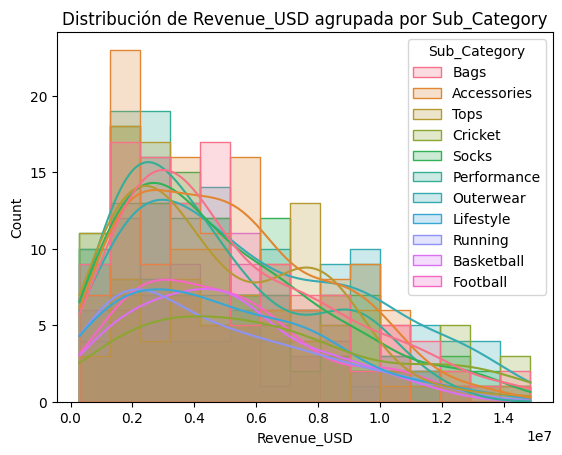

Columnas categóricas relacionadas con el target: ['Sub_Category']


In [42]:
# Llamar a la función con tus datos
categorical_columns = plot_features_cat_regression(
    df=df_nike, 
    target_col="Revenue_USD",  # Cambia al nombre exacto de tu columna objetivo
    columns=[],  # Puedes dejarlo vacío para usar todas las columnas categóricas
    pvalue=0.05,  # Nivel de significancia estadística
    with_individual_plot=False  # Cambia a True si quieres gráficos individuales por categoría
)

# Ver las columnas seleccionadas
print("Columnas categóricas relacionadas con el target:", categorical_columns)
